## Telluric fitting

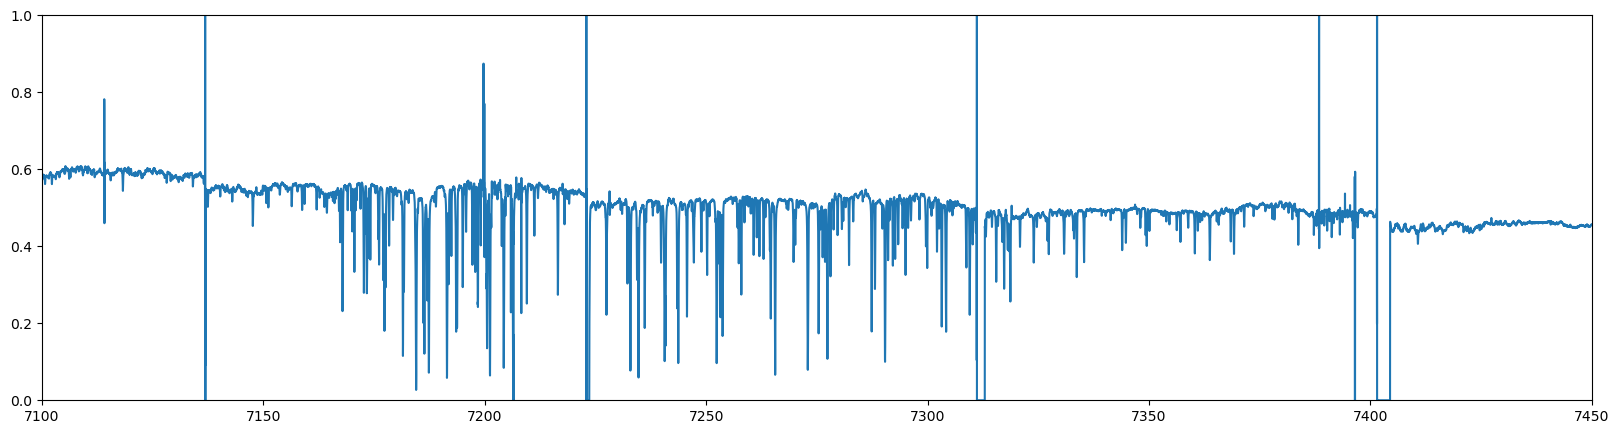

In [18]:
# Install JoviSpec
# git clone https://github.com/HajimeKawahara/jovispec.git
# python setup.py install

from decimal import Decimal
from jovispec import abcio
import pkg_resources


jupiter_data = pkg_resources.resource_filename("jovispec", "jupiter_data")

#red 
#rlambc, rspecc, rheadc=abcio.read_qfits("06033",jupiter_data,ext="q")
#rlambw, rspecw, rheadw=abcio.read_qfits("06047",jupiter_data,ext="q")
#rlambe, rspece, rheade=abcio.read_qfits("06049",jupiter_data,ext="q")

#blue
#rlamb1, rspec1, rhead=abcio.read_qfits("06000",jupiter_data,ext="q") #WASP33b
rlamb2, rspec2, rhead=abcio.read_qfits("06002",jupiter_data,ext="q") #WASP33b
rlamb3, rspec3, rhead=abcio.read_qfits("06004",jupiter_data,ext="q") #WASP33b
rlamb4, rspec4, rhead=abcio.read_qfits("06006",jupiter_data,ext="q") #WASP33b
rlamb5, rspec5, rhead=abcio.read_qfits("06008",jupiter_data,ext="q") #WASP33b
rlamb = rlamb2
rspec = rspec2 + rspec3 + rspec4 + rspec5

wavelength_start = 7100.0 #AA
wavelength_end = 7450.0 #AA

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,5))
plt.plot(rlamb,rspec)
plt.ylim(0.0,1.0)
plt.xlim(wavelength_start, wavelength_end)
plt.show()

In [19]:
import matplotlib.pyplot as plt
import numpy as np

In [20]:
mask_wav = [
[7114.0,7114.2],
[7136.8, 7137.0],
[7199.5,7200.0],
[7222.8,7224.0],
[7311.0,7313.],
[7388.3,7388.5],
[7396.4,7396.6],
[7401.0,7405.0]
]
rlamb = np.array([float(d) for d in rlamb])
mask_index=np.digitize(mask_wav,rlamb)
for ind in mask_index:
    rspec[ind[0]:ind[1]+1] = None

mask = rspec == rspec
rlamb = rlamb[mask]
rspec = rspec[mask]

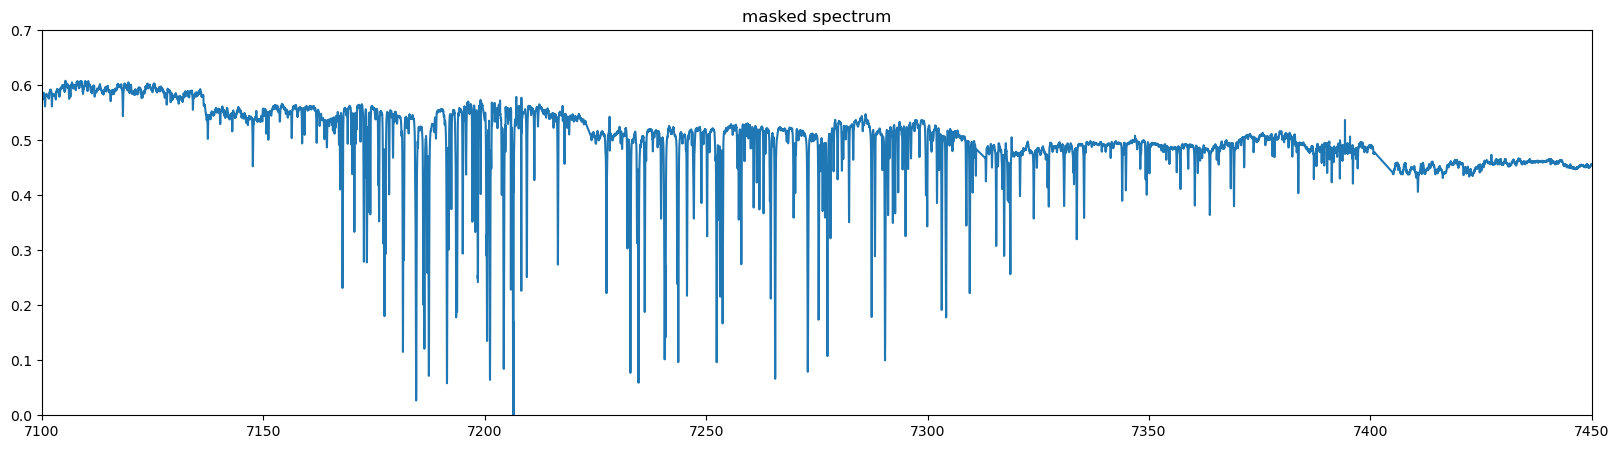

In [23]:
fig = plt.figure(figsize=(20,5))
plt.plot(rlamb,rspec)
plt.ylim(0.0,0.7)
plt.xlim(wavelength_start, wavelength_end)
plt.title("masked spectrum")
plt.show()

In [45]:
from exojax.spec.api import MdbHitran
mdb_water = MdbHitran("H2O", nurange=[1.e8/wavelength_end, 1.e8/wavelength_start], isotope=0)

In [63]:
wavelength_start = 7100.0 #AA
wavelength_end = 7450.0 #AA
from exojax.spec.api import MdbHitran
from exojax.spec.opacalc import OpaDirect
from exojax.spec.opacalc import OpaPremodit
from exojax.utils.grids import wavenumber_grid
N=40000
mdb_water = MdbHitran("H2O", nurange=[1.e8/wavelength_end, 1.e8/wavelength_start], isotope=1)
nus, wav, res = wavenumber_grid(wavelength_start, wavelength_end, N, xsmode="lpf", unit="AA")
opa = OpaDirect(mdb_water, nu_grid=nus)
#opa = OpaPremodit(mdb_water, nu_grid=nus, allow_32bit=True, auto_trange=[150.0,250.0])

xsmode =  lpf
xsmode assumes ESLOG in wavenumber space: mode=lpf
We changed the policy of the order of wavenumber/wavelength grids
wavenumber grid should be in ascending order and now 
users can specify the order of the wavelength grid by themselves.
Your wavelength grid is in ***  descending  *** order
This might causes the bug if you update ExoJAX. 
Note that the older ExoJAX assumes ascending order as wavelength grid.
OpaPremodit: params automatically set.
Robust range: 148.362692491353 - 268.1092302598172 K
Change the reference temperature from 296.0K to 163.08464046497667 K.
OpaPremodit: Tref_broadening is set to  193.64916731037079 K
OpaPremodit: gamma_air and n_air are used. gamma_ref = gamma_air/Patm
# of reference width grid :  19
# of temperature exponent grid : 3


/home/kawahara/exojax/src/exojax/utils/jaxstatus.py:19: UserWarning: JAX is 32bit mode. We recommend to use 64bit mode. 
You can change to 64bit mode by writing 

    from jax import config 
    config.update("jax_enable_x64", True)

  warnings.warn(msg+how_change_msg)
/home/kawahara/exojax/src/exojax/spec/set_ditgrid.py:52: UserWarning: There exists negative or zero value.
  warnings.warn("There exists negative or zero value.")
uniqidx: 100%|██████████| 25/25 [00:00<00:00, 2517.23it/s]


Premodit: Twt= 235.52614040293392 K Tref= 163.08464046497667 K
Making LSD:|####################| 100%


In [61]:
T = 200.0
P = 0.7
xsv = opa.xsvector(T,P)

In [56]:
print(len(mdb_water.nu_lines))


12304


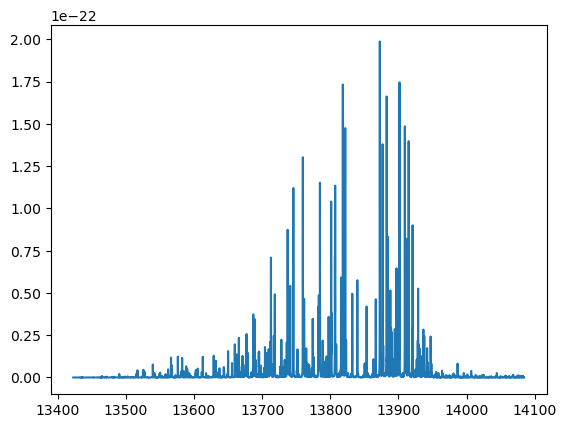

In [62]:
plt.plot(nus,xsv)

In [54]:
1.e8/wavelength_end, 1.e8/wavelength_start

(13422.818791946309, 14084.507042253521)